DBSCAN is a popular density-based data clustering algorithm. To cluster data points, this algorithm separates the high-density regions of the data from the low-density areas. Unlike the K-Means algorithm, the best thing with this algorithm is that we don’t need to provide the number of clusters required prior.

https://www.section.io/engineering-education/dbscan-clustering-in-python/

https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/main/_notebooks/2020-07-29-04-Credit-Card-Fraud-Detection.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ADSExperiments/Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (200, 5)


In [ ]:
data.isnull().any().any()

False

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
x1='Annual Income (k$)'
y1='Spending Score (1-100)'

Text(0, 0.5, 'Average Score')

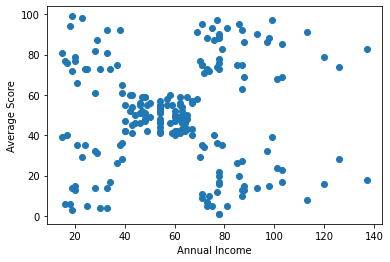

In [35]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel("Annual Income")
plt.ylabel("Average Score")

The above output means there are no missing values in our dataset. Since our data is ready to use, let us extract the Annual Income and the Spending Score columns and apply our DBSCAN model to them.

In [ ]:
x = data.loc[:, ['Annual Income (k$)',
                 'Spending Score (1-100)']].values
                 

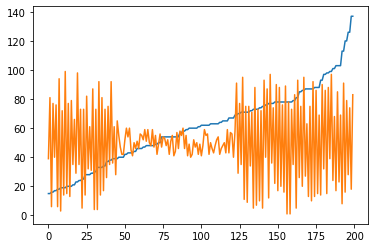

In [ ]:
plt.plot(x)

In [ ]:
print(x.shape)

(200, 2)


Before we apply the DBSCAN model, first, we need to obtain its two parameters.

MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:
If the dataset has two dimensions, use the min sample per cluster as 4.
If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension
Since our data is two-dimensional, we shall use the default value of 4 as our MinPoint parameter.

Epsilon (Eps): To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.

In [36]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours
print(distances,indices)

[[ 0.          2.23606798]
 [ 0.          4.12310563]
 [ 0.          2.        ]
 [ 0.          1.41421356]
 [ 0.          2.23606798]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          5.09901951]
 [ 0.          3.16227766]
 [ 0.          4.47213595]
 [ 0.          1.41421356]
 [ 0.          4.12310563]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          3.        ]
 [ 0.          6.32455532]
 [ 0.          5.83095189]
 [ 0.          4.12310563]
 [ 0.          3.        ]
 [ 0.          1.        ]
 [ 0.          5.09901951]
 [ 0.          1.        ]
 [ 0.          5.        ]
 [ 0.          5.09901951]
 [ 0.          1.41421356]
 [ 0.          8.60232527]
 [ 0.          1.41421356]
 [ 0.          5.09901951]
 [ 0.          3.        ]
 [ 0.          4.        ]
 [ 0.          3.        ]
 [ 0.          5.        ]
 [ 0.          3.16227766]
 [ 0.          5.09901951]
 [ 0.          3.16227766]
 

In [ ]:
print(nbrs)

NearestNeighbors(n_neighbors=2)


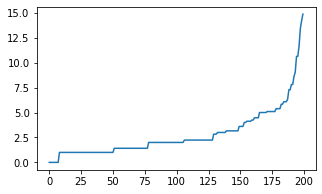

In [37]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [ ]:
print(distances)

[[ 0.          2.23606798]
 [ 0.          4.12310563]
 [ 0.          2.        ]
 [ 0.          1.41421356]
 [ 0.          2.23606798]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          5.09901951]
 [ 0.          3.16227766]
 [ 0.          4.47213595]
 [ 0.          1.41421356]
 [ 0.          4.12310563]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          3.        ]
 [ 0.          6.32455532]
 [ 0.          5.83095189]
 [ 0.          4.12310563]
 [ 0.          3.        ]
 [ 0.          1.        ]
 [ 0.          5.09901951]
 [ 0.          1.        ]
 [ 0.          5.        ]
 [ 0.          5.09901951]
 [ 0.          1.41421356]
 [ 0.          8.60232527]
 [ 0.          1.41421356]
 [ 0.          5.09901951]
 [ 0.          3.        ]
 [ 0.          4.        ]
 [ 0.          3.        ]
 [ 0.          5.        ]
 [ 0.          3.16227766]
 [ 0.          5.09901951]
 [ 0.          3.16227766]
 

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

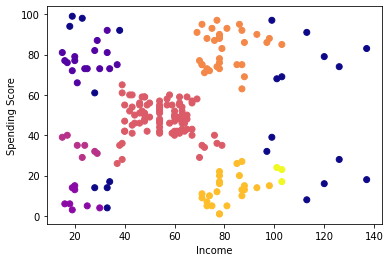

In [ ]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot